<a href="https://colab.research.google.com/github/ducodbs0516/pdm18/blob/main/py-tensorflow/DL2-CNN/dl2_01_mnist_CNN_start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN model of mnist dataset**
- Conv2D + FCN
    * Conv2D : 2차원 합성곱 필터링 + 풀링(Pooling)
    - > 2차원 필터로 영상을 대표하는 특징을 추출
    * FCN : 1차원 완전연결신경망
    - > Conv2D에서 추출된 대표 특징들을 이용하여 FCN으로 최종 학습 완료

***

![mnist_NN_2_layers](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

(source: https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

print(tf.__version__)

2.7.0


## **데이터 로딩, 정규화**

In [2]:
from keras.datasets import mnist

(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

# Reshape
X_train = X_train0.reshape(60000,28,28,1)
X_test = X_test0.reshape(10000,28,28,1)

# Normalization
X_train, X_test = X_train/255.0, X_test/255.0 # 정규화

print("X_train={0}".format(X_train.shape))
print("y_train={0}".format(y_train0.shape)) 
print("X_test={0}".format(X_test.shape))
print("y_test={0}".format(y_test0.shape))

11501568/11490434 [==============================] - 0s 0us/step
X_train=(60000, 28, 28, 1)
y_train=(60000,)
X_test=(10000, 28, 28, 1)
y_test=(10000,)


In [3]:
# One-Hot-Encoding
# Use function to_categorical() to do One-Hot-Encoding
# tf.keras.utils.to_categorical
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)
y_train.shape,y_test.shape

((60000, 10), (10000, 10))

### Display numbers
- 10 representative numbers

(5923, 28, 28)
(6742, 28, 28)
(5958, 28, 28)
(6131, 28, 28)
(5842, 28, 28)
(5421, 28, 28)
(5918, 28, 28)
(6265, 28, 28)
(5851, 28, 28)
(5949, 28, 28)


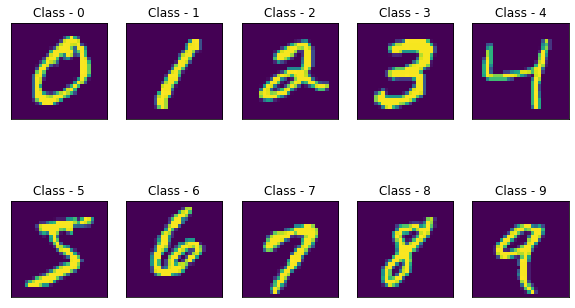

In [4]:
class_names = ["0","1","2","3","4","5","6","7","8","9"]
fig = plt.figure(figsize=(10,6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    num0_9 = X_train0[y_train0 == i]
    print(num0_9.shape)
    plt.imshow(num0_9[0]) #, cmap='gray') #, interpolation='none')
    plt.title("Class - %d" % (i))
    plt.xticks([])
    plt.yticks([])




# Design CNN

### import Conv2D, MaxPool2D

In [5]:
from keras.layers import Conv2D, MaxPool2D, Flatten

## **CNN1 + FCN2**
- CNN1: Conv2D + MaxPooling2D
- FCN2: Dense(128) + Output(8) 

In [6]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [7]:
c1f2 = keras.models.Sequential([                # 순차모델  # Conv2D --> 차원 축소 MaxPool2D
    Conv2D(input_shape=(28,28,1), filters= 32, 
            kernel_size=(3,3),                  # 3x3 convolution 
           strides=(1,1),                       # 한칸씩 이동
           padding='same',                      # 이미지 크기 유지 
           activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),  # 중복 하지 않고 2x2 두칸씩 뛰어넘어 convolution
    Flatten(),                                  # MaxPool2D 2차원 행렬을 1차원 벡터로 바꾸기
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c1f2.compile(optimizer='adam',                  # 순차 모델 최적화 방법
              loss='categorical_crossentropy',  # output이 2개 이상일때 
              metrics=['accuracy'])             # 정확도 계산

In [8]:
c1f2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               802944    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [ ]:
3*3*32+32  # c1f2.summary() 첫번째 컨볼루션 파라미터 320개 
'''
3x3 9개의 무작위 수로 필터 결정
첫번째 뉴런 32개 
각 뉴런마다 바이어스가 있으므로 총 바이어스 개수는 +32개 
'''

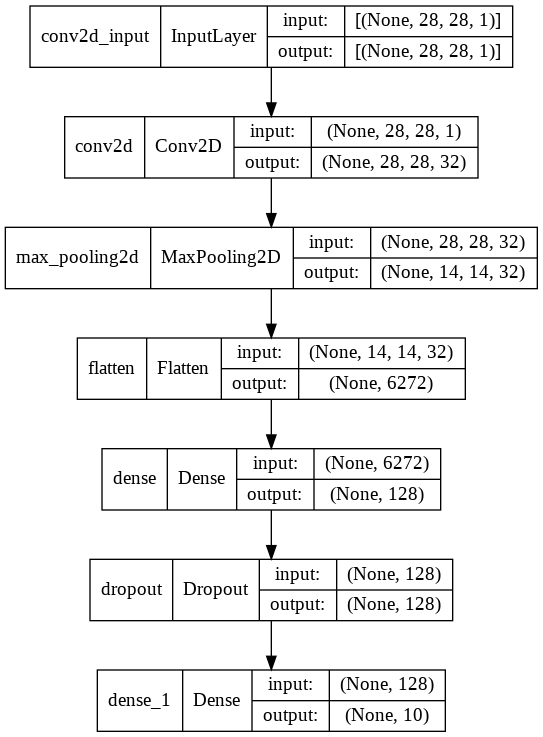

In [10]:
# Plot model # input output 그래프
from tensorflow.keras.utils import plot_model
plot_model(c1f2, show_shapes=True, show_layer_names=True, to_file='model_c1f2.png')

In [11]:
c1f2.fit(X_train, y_train, epochs = 20,  batch_size = 100, 
        validation_data = (X_test, y_test))   # validation_split =0.2
# ValueError: Shapes (100, 10) and (100, 14, 14, 10) are incompatible ==> 첫번째 히든레어는 컨볼루션 레이어 FCN으로 보내기전에는 2차원 풀링 데이터를 1차원 벡터로 만들어 줘야함 
# 2차원 특징 --> 1차원 벡터
# MaxPool2D --> Flatten()

Epoch 1/20
600/600 [==============================] - 15s 9ms/step - loss: 0.2418 - accuracy: 0.9287 - val_loss: 0.0768 - val_accuracy: 0.9762
Epoch 2/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0819 - accuracy: 0.9762 - val_loss: 0.0563 - val_accuracy: 0.9815
Epoch 3/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0577 - accuracy: 0.9827 - val_loss: 0.0449 - val_accuracy: 0.9842
Epoch 4/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0459 - accuracy: 0.9859 - val_loss: 0.0382 - val_accuracy: 0.9867
Epoch 5/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0369 - accuracy: 0.9888 - val_loss: 0.0415 - val_accuracy: 0.9867
Epoch 6/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0303 - accuracy: 0.9903 - val_loss: 0.0378 - val_accuracy: 0.9868
Epoch 7/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0261 - accuracy: 0.9918 - val_loss: 0.0360 - val_accuracy: 0.9881
Epoch

In [12]:
c1f2.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 0s 4ms/step - loss: 0.0463 - accuracy: 0.9890


[0.0462825782597065, 0.9890000224113464]

---

## **CNN1 + FCN3**

In [13]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [14]:
c1f3 = tf.keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1),
           kernel_size=(3,3),                    # 3x3 convolution 
           strides=(1,1),                        # 한칸씩 이동
           filters= 32, 
           padding='same',                       # 이미지 크기 유지 
           activation='relu'),  
    MaxPool2D(pool_size=(2,2), strides=(2,2)),   # 중복 하지 않고 2x2 두칸씩 뛰어넘어 convolution
    Flatten(),                              
    tf.keras.layers.Flatten(input_shape=(28, 28)),# fcn을 위해 flatten 하는 과정
    tf.keras.layers.Dense(256, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax')
])

c1f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [15]:
c1f3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 flatten_2 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               1605888   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                      

In [16]:
c1f3.fit(X_train,y_train, epochs= 20 , batch_size = 100)

Epoch 1/20
600/600 [==============================] - 6s 9ms/step - loss: 0.2419 - accuracy: 0.9265
Epoch 2/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0744 - accuracy: 0.9773
Epoch 3/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0520 - accuracy: 0.9843
Epoch 4/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0370 - accuracy: 0.9884
Epoch 5/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0298 - accuracy: 0.9902
Epoch 6/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0233 - accuracy: 0.9928
Epoch 7/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0198 - accuracy: 0.9934
Epoch 8/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0160 - accuracy: 0.9947
Epoch 9/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0156 - accuracy: 0.9948
Epoch 10/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0132 - accuracy: 0.9958

In [17]:
c1f3.evaluate(X_test, y_test, batch_size= 100)

100/100 [==============================] - 1s 5ms/step - loss: 0.0528 - accuracy: 0.9899


[0.052770182490348816, 0.9898999929428101]

## **CNN2 + FCN2**

In [41]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [42]:
c2f2 = tf.keras.models.Sequential([ 
    # 1번째 컨볼루션 히든레이어                               
    Conv2D(input_shape=(28,28,1),
           kernel_size=(3,3),strides=(1,1),
           filters= 64, padding='same',
           activation='relu'), 
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    # 2번째 컨볼루션 히든레이어
    Conv2D(kernel_size=(3,3),strides=(1,1),
           filters= 32, padding='same',
           activation='relu'),  
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(),
    # f2
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='softmax')
])

c2f2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [20]:
c2f2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1568)              0         
                                                                 
 dense_5 (Dense)             (None, 128)              

In [21]:
c2f2.fit(X_train, y_train, epochs = 20 , batch_size = 100)

Epoch 1/20
600/600 [==============================] - 6s 9ms/step - loss: 0.2210 - accuracy: 0.9331
Epoch 2/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0663 - accuracy: 0.9800
Epoch 3/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0458 - accuracy: 0.9861
Epoch 4/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0364 - accuracy: 0.9890
Epoch 5/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0301 - accuracy: 0.9901
Epoch 6/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0263 - accuracy: 0.9920
Epoch 7/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0230 - accuracy: 0.9926
Epoch 8/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0182 - accuracy: 0.9942
Epoch 9/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0169 - accuracy: 0.9941
Epoch 10/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0147 - accuracy: 0.9951

In [22]:
c2f2.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 1s 6ms/step - loss: 0.0266 - accuracy: 0.9931


[0.026600686833262444, 0.9930999875068665]

## **CNN2 + FCN3**

In [23]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [24]:
c2f3 = tf.keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1),
           kernel_size=(3,3),strides=(1,1),
           filters= 64, padding='same',
           activation='relu'), 
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(kernel_size=(3,3),strides=(1,1),
           filters= 32, padding='same',
           activation='relu'),  
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(),
    # f3
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='softmax')

])

c2f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [25]:
c2f3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1568)              0         
                                                                 
 dense_7 (Dense)             (None, 128)              

In [26]:
c2f3.fit(X_train, y_train, epochs=20, batch_size = 100)

Epoch 1/20
600/600 [==============================] - 7s 10ms/step - loss: 0.3023 - accuracy: 0.9068
Epoch 2/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0894 - accuracy: 0.9739
Epoch 3/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0621 - accuracy: 0.9823
Epoch 4/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0511 - accuracy: 0.9852
Epoch 5/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0437 - accuracy: 0.9874
Epoch 6/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0346 - accuracy: 0.9900
Epoch 7/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0318 - accuracy: 0.9906
Epoch 8/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0257 - accuracy: 0.9922
Epoch 9/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0240 - accuracy: 0.9925
Epoch 10/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0220 - accuracy: 0.993

In [27]:
c2f3.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 1s 6ms/step - loss: 0.0390 - accuracy: 0.9909


[0.038966186344623566, 0.9908999800682068]

# **[DIY] Hidden layer에 따른 정확도**

In [28]:
c1f2.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 0s 4ms/step - loss: 0.0463 - accuracy: 0.9890


[0.0462825782597065, 0.9890000224113464]

In [29]:
c1f3.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 1s 5ms/step - loss: 0.0528 - accuracy: 0.9899


[0.052770182490348816, 0.9898999929428101]

In [30]:
c2f2.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 1s 6ms/step - loss: 0.0266 - accuracy: 0.9931


[0.026600686833262444, 0.9930999875068665]

In [31]:
c2f3.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 1s 6ms/step - loss: 0.0390 - accuracy: 0.9909


[0.038966186344623566, 0.9908999800682068]

In [32]:
# Try another method!!
fcn_result = [[0.0462825782597065, 0.9890000224113464], 
 [0.052770182490348816, 0.9898999929428101], 
 [0.026600686833262444, 0.9930999875068665], 
 [0.038966186344623566, 0.9908999800682068]]

In [33]:
# select accuracies
accuracy = [row[1] for row in fcn_result]
accuracy      # ==> c2f2 best model

[0.9890000224113464,
 0.9898999929428101,
 0.9930999875068665,
 0.9908999800682068]

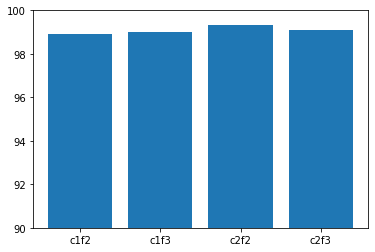

In [37]:
x = np.arange(4)
cnns = ['c1f2','c1f3','c2f2','c2f3']
accuracies = [acc*100 for acc in accuracy] # %

#plt.figure(figsize=(5,5))
plt.bar(x, accuracies)
plt.xticks(x, cnns)
plt.ylim((90,100))
plt.show()

## 모형의 저장

- 트레이닝이 끝난 모형은 save 메서드로 가중치와 함께 hdf5 형식으로 저장
- load 명령으로 불러 사용

In [38]:
c2f2.save('c2f2_best.hdf5')

In [39]:
from keras.models import load_model

model = load_model('c2f2_best.hdf5')
model.evaluate(X_test, y_test, batch_size=100)

100/100 [==============================] - 1s 6ms/step - loss: 0.0266 - accuracy: 0.9931


[0.026600686833262444, 0.9930999875068665]

## C2F2 모델에 대한 loss, accuracy 그래프를 그리시오.

In [43]:
hist = c2f2.fit(X_train, y_train,  # c2f2 초기화 후 실행 (c2f2 이전에 실행된 내용과 연결될 수 있으므로 seed, 파라미터 초기화)
         epochs = 20 , 
         batch_size =100, 
         validation_data=(X_test,y_test))

Epoch 1/20
600/600 [==============================] - 7s 10ms/step - loss: 0.2208 - accuracy: 0.9330 - val_loss: 0.0526 - val_accuracy: 0.9834
Epoch 2/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0665 - accuracy: 0.9797 - val_loss: 0.0349 - val_accuracy: 0.9879
Epoch 3/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0464 - accuracy: 0.9857 - val_loss: 0.0305 - val_accuracy: 0.9908
Epoch 4/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0368 - accuracy: 0.9888 - val_loss: 0.0289 - val_accuracy: 0.9901
Epoch 5/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0303 - accuracy: 0.9904 - val_loss: 0.0283 - val_accuracy: 0.9901
Epoch 6/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0257 - accuracy: 0.9921 - val_loss: 0.0235 - val_accuracy: 0.9916
Epoch 7/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0226 - accuracy: 0.9932 - val_loss: 0.0238 - val_accuracy: 0.9929

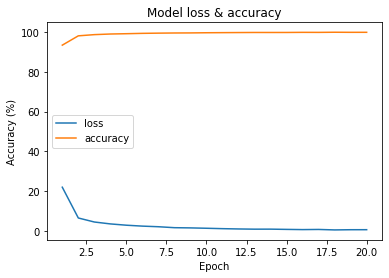

In [44]:
# Plot loass and accuracy
# Plot training & validation accuracy values
epochs = 20
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list) 
plt.plot(range(1,epochs+1),acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')
plt.show()

- validation

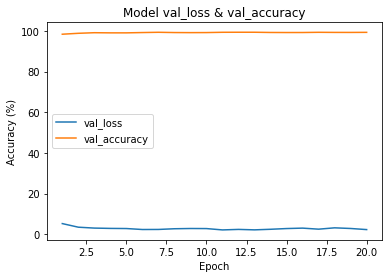

In [45]:
vloss_list = [100 * i for i in hist.history['val_loss']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]
plt.plot(range(1,epochs+1),vloss_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')
plt.show()

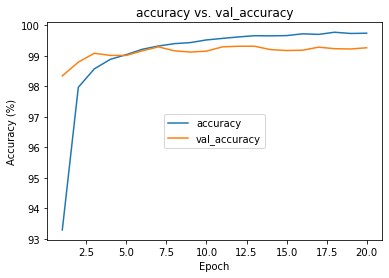

In [46]:
plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('accuracy vs. val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy'], loc='center')
plt.show()

***

## [DIY] C2F3 모델에 대한 loss, accuracy 그래프를 추가하시오.

In [47]:
c2f3.save('c2f3_best.hdf5')

In [49]:
from keras.models import load_model

model = load_model('c2f3_best.hdf5')
model.evaluate(X_test, y_test, batch_size=100)

100/100 [==============================] - 1s 6ms/step - loss: 0.0390 - accuracy: 0.9909


[0.038966186344623566, 0.9908999800682068]

In [50]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [51]:
c2f3 = tf.keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1),
           kernel_size=(3,3),strides=(1,1),
           filters= 64, padding='same',
           activation='relu'), 
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(kernel_size=(3,3),strides=(1,1),
           filters= 32, padding='same',
           activation='relu'),  
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(),
    # f3
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='softmax')

])

c2f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [52]:
hist = c2f2.fit(X_train, y_train,
         epochs = 20 , 
         batch_size =100, 
         validation_data=(X_test,y_test))

Epoch 1/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0055 - accuracy: 0.9981 - val_loss: 0.0317 - val_accuracy: 0.9929
Epoch 2/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0053 - accuracy: 0.9982 - val_loss: 0.0392 - val_accuracy: 0.9921
Epoch 3/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0058 - accuracy: 0.9980 - val_loss: 0.0358 - val_accuracy: 0.9921
Epoch 4/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0053 - accuracy: 0.9982 - val_loss: 0.0339 - val_accuracy: 0.9913
Epoch 5/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0062 - accuracy: 0.9980 - val_loss: 0.0361 - val_accuracy: 0.9925
Epoch 6/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0055 - accuracy: 0.9982 - val_loss: 0.0373 - val_accuracy: 0.9916
Epoch 7/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0051 - accuracy: 0.9983 - val_loss: 0.0322 - val_accuracy: 0.9928
Ep

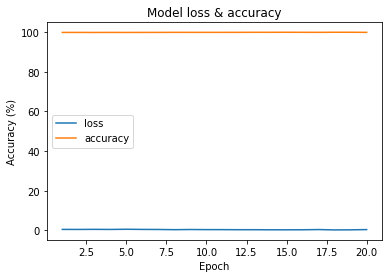

In [53]:
# Plot loass and accuracy
# Plot training & validation accuracy values
epochs = 20
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list) 
plt.plot(range(1,epochs+1),acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')
plt.show()

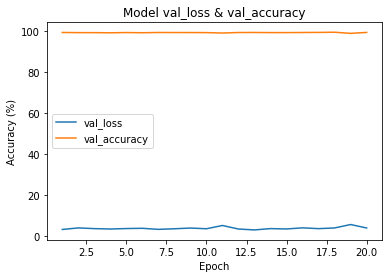

In [54]:
vloss_list = [100 * i for i in hist.history['val_loss']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]
plt.plot(range(1,epochs+1),vloss_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')
plt.show()

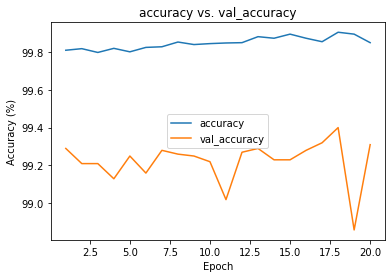

In [55]:
plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('accuracy vs. val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy'], loc='center')
plt.show()

***